# Exercise 2.1

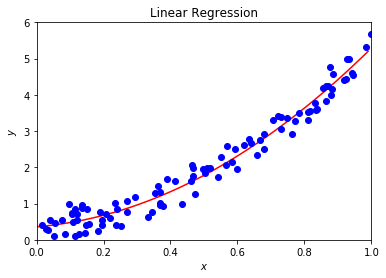

The predicted coeffs are
[[0.36003157]
 [0.74636813]
 [4.18351637]]
We had a noise factor of 1.00


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Setup input data. 
# We make numberofpoints points
# the x's are chosen randomly 
# the y's according to the fomula and with some noise
numberofpoints = 100
noise = 1
x = np.random.rand(numberofpoints,1)
y = 5*x*x + noise*np.random.rand(numberofpoints,1)

# Make \hat{X} matrix, xb, with rows of 1, x, x^2
# Compute beta matrix according to formula from slides/book
# Beta will contain the coefficients of our "predicted" second degree polynomial
xb = np.c_[np.ones((numberofpoints,1)),x,x*x]
beta = np.linalg.inv(xb.T.dot(xb)).dot(xb.T).dot(y)

# generate a bunch of x's for plotting
xstep = 0.01
xstepinv = 100
xpoints = np.arange(0.0, 1.0, xstep)

# Compute the predicted y values for all the plotting x's
xbnew = np.c_[np.ones((xstepinv,1)), xpoints, xpoints*xpoints]
ypredict = xbnew.dot(beta)

# Do the plotting
# first draw a line between the plotting x's and their predicted y's 
plt.plot(xpoints, ypredict, "r-")
# Then plot the points we predicted from
plt.plot(x, y ,'bo')
# Setup axis and labels
plt.axis([0, 1.0, 0, 6.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Linear Regression')
plt.show()

print("The predicted coeffs are")
print(beta)
print("We had a noise factor of %.2f" % noise)


# Exercise 2.2 and 2.3

The intercept alpha: 
 [0.21427782]
Coefficient beta : 
 [[4.13377971e-03 5.03181132e+00]]
Mean squared error: 0.02
My MSE calc 0.02
The R2 score: 0.99
My R2 calc 0.99


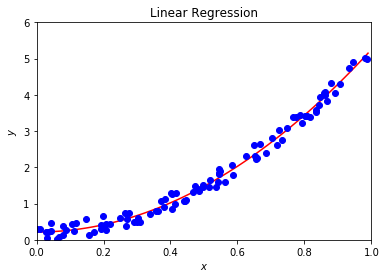

In [123]:
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error, mean_absolute_error

#######
# functions to compute stat stuff
#######

# Takes two lists, xs, ys, assumed to be of same length, n. 
# Computes (1/n) \sum_i (xs[i] - ys[i])^2
def MSE(xs, ys) :
    sqdiff = map(lambda t : (t[0] - t[1])**2, zip(xs,ys))
    return sum(sqdiff)/len(xs)

# Takes two lists, xs, ys and computes r2 score 
def r2d2score(xs,ys) : 
    avgxs = sum(xs)/len(xs)
    sqoffavg = sum(map(lambda t : (t - avgxs)**2, xs))
    sqdiff = sum(map(lambda t : (t[0] - t[1])**2, zip(xs,ys)))
    return 1 - sqdiff/sqoffavg


# Setup input data. 
# We make numberofpoints points
# the x's are chosen randomly 
# the y's according to the fomula and with some noise
numberofpoints = 100
x = np.random.rand(numberofpoints,1)
y = 5*x*x + 0.5*np.random.rand(numberofpoints, 1)
# trying a normal distrubution on the noise
#y = 5*x*x + 1*(np.c_[np.random.normal(0,0.2,numberofpoints)])

# Use the sci-kit learn stuff
linreg = LinearRegression()
linreg.fit(np.c_[x, x*x], y)

# Compute the predicted y values for our x's
ypredict = linreg.predict(np.c_[x, x*x])

# print all the coefficients and error stuff
print('The intercept alpha: \n', linreg.intercept_)
print('Coefficient beta : \n', linreg.coef_)
# The mean squared error                               
print("Mean squared error: %.2f" % mean_squared_error(y, ypredict))
print("My MSE calc %.2f" % MSE(y,ypredict))
# The r2 score
print("The R2 score: %.2f" % r2_score(y, ypredict))
print("My R2 calc %.2f" % r2d2score(y,ypredict))

# generate a bunch of x's for plotting
xstep = 0.01
xstepinv = 100
xpoints = np.arange(0.0, 1.0, xstep)

# compute the predicted y's of the x's
ypoints = linreg.predict(np.c_[xpoints, xpoints*xpoints])

# Do the plotting
# first draw a line between the plotting x's and their predicted y's 
plt.plot(xpoints, ypoints, "r-")
# Then plot the points we predicted from
plt.plot(x, y ,'bo')
# Setup axis and labels
plt.axis([0, 1.0, 0, 6.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Linear Regression')
plt.show()
